# Краткое описание проекта

На основании исторические данных о продажах игр выполнить их предобработку, провести исследовательский анализ данных, составить портрет пользователя каждого региона, проверить гипотезы и сделать выводы. 

# Цель проекта
1. Открыть файл с данными и изучить общую информацию;

2. Подготовить данные:
    - Заменить названия столбцов (привести к нижнему регистру);
    - Преобразовать данные в нужные типы. Описать, в каких столбцах заменили тип данных и почему;
    - Обработать пропуски при необходимости: 
        - Объяснить, почему заполнили пропуски определённым образом или почему не стал это делать;
        - Описать причины, которые могли привести к пропускам;
    - Обратить внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разобрать это значение и описать, как его обработать;
    - Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.
3. Провести исследовательский анализ данных:
    - Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    - Как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    - Взять данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    - *!!!Не учитывать в работе данные за предыдущие годы.*
    - Какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
    - Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
    - Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
    - Соотнести выводы с продажами игр на других платформах.
    - Посмотреть на общее распределение игр по жанрам:
        - Что можно сказать о самых прибыльных жанрах? 
        - Выделяются ли жанры с высокими и низкими продажами?
4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Проверить гипотезы (зададим самостоятельно пороговое значение alpha):
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
    - Поясните:
        - Как вы сформулировали нулевую и альтернативную гипотезы;
        - Какой критерий применили для проверки гипотез и почему.
6. Написать общий вывод


# Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


# План работы
1. Открыть файл с данными и изучить общую информацию;
2. Подготовить данные;
3. Провести исследовательский анализ данных;
4. Составить портрет пользователя каждого региона. Определить для пользователя каждого региона (NA, EU, JP);
5. Проверить гипотезы (зададим самостоятельно пороговое значение alpha);
6. Написать общий вывод. 



In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Откроем файл с данными и изучим общую информацию:

In [2]:
data_games = pd.read_csv('../datasets/games.csv')

In [3]:
data_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data_games.shape

(16715, 11)

In [5]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
data_games.describe(include = 'all')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


In [7]:
data_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [8]:
# посмотрим уникальные значения столбцов
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in data_games.columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(data_games[i].unique()))+'\033[0m')
    print(data_games[i].sort_values().unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак Name имеет 11560 следующих уникальных значений:
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'wwe Smackdown vs. Raw 2006' '¡Shin Chan Flipa en colores!' nan]
---------------------------------------------------------------------------------
Признак Platform имеет 31 следующих уникальных значений:
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
---------------------------------------------------------------------------------
Признак Year_of_Release имеет 38 следующих уникальных значений:
[1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989. 1990. 1991.
 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001. 2002. 2003.
 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015.
 2016.   nan]
---------------------------------------------------------------------------------
Пр

In [9]:
data_games.duplicated().sum()

0

### Выводы по просмотру данных и общей информации:
1. Представлены данные состоят из 11 столбцов и 16715 строк.
2. Часть столбцов имеют пропуски:
    - Name
    - Year_of_Release
    - Critic_Score
    - User_Score
    - Rating
3. Столбец Year_of_Release имеет тип float64, а должен int. 
4. Столбец User_Score имеет тип object, а должен float или int. 
5. Дублирующих данных нет

## Подготовка данных:

In [10]:
# Заменить названия столбцов (привести к нижнему регистру)
data_games.columns = [x.lower() for x in data_games.columns]

In [11]:
data_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Обработаем пропуски и преобразуем данные в нужные типы:

In [12]:
# посмотрим пустые значения в столбце name
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Так как осутствующие данные заполнить точно нельзя, и эти данные не помешают анализу, то удалим эти строки.

In [13]:
# удаляем данные с пустыми значениями из столбца name
data_games = data_games.dropna(subset=['name']).reset_index(drop=True)

В столбце `name` две пустые ячейки. 

Заменить на основе предоставленных данных точно нельзя, поэтому эти данные удалим из данных

In [14]:
# 
len(data_games[data_games['name'].isna()])

0

Обработаем пустые ячейки по столбцу `year_of_release`.

Посмотрим есть ли данные по `name` на других `platform`:
- Где получим 1 уникальное значение, там установим медианное значение по `platform` 

- Где 2, там пустые ячейки заменим на цифровое значения, т.к. чаще всего игра с одинаковым названием выходила в один год на всех платформам.

- Где 3 и 4 выберем `year_of_release` в рамках работы `platform` и по нему установим медианное значение, если не будет таких данных, то установим медианное значение по `platform`. 


In [15]:
# Посчитаем name, содержащие пустые ячейки в year_of_release.
dict_len ={}
for ind in data_games[data_games['year_of_release'].isna()].index:
    data_2 = data_games[data_games['name'] == data_games.iloc[ind]['name']]['year_of_release']
    a = len(data_2.unique())
    if str(a) in dict_len:
        dict_len[str(a)] += 1
    else:
        dict_len[str(a)] = dict_len.get(str(a), 1)
dict_len

{'2': 111, '1': 146, '4': 2, '3': 10}

In [16]:
# заполним пустые если уникальных значений имени по годам выпуска равно 2, пустые заполним цифрой
for ind in data_games[data_games['year_of_release'].isna()].index.tolist():
    if len(data_games.loc[(data_games['name'] == data_games.iloc[ind]['name']),  'year_of_release'].unique()) == 2:
        data_games.loc[ind,'year_of_release'] = (data_games.loc[(data_games['name'] == data_games.iloc[ind]['name']),  'year_of_release'].value_counts().index[0])

In [17]:
# заполним пустые если уникальных значений имени по годам выпуска больше 2
# смотрим year_of_release был в рамках работы platform, и присваеваем медианное значения по year_of_release, 
# если данных не будет, то медианное значение по platform
for ind in data_games[data_games['year_of_release'].isna()].index:
    data_2 = data_games[data_games['name'] == data_games.iloc[ind]['name']]['year_of_release']
    if len(data_2.unique()) > 2:
        
        data_3 = data_games[data_games['platform'] == data_games.iloc[ind]['platform']]['year_of_release']
        data_3_min = data_3.min()
        data_3_max = data_3.max()
        if np.isnan(data_2[data_2.between(data_3_min, data_3_max)].median()):
            data_games.loc[ind,'year_of_release'] = int(data_3.median())
        else:
            data_games.loc[ind,'year_of_release'] = int(data_2[data_2.between(data_3_min, data_3_max)].median())

In [18]:
# осдавшиеся пустые ячейки заполним медийным значением по платформе
data_games['year_of_release'] = data_games['year_of_release'].\
fillna(data_games.groupby('platform')['year_of_release'].transform('median'))

In [19]:
#
data_games['year_of_release'] = data_games['year_of_release'].astype(int)

Обработали пустые ячейки по столбцу `year_of_release`.

Посмотрели есть ли данные по `name` на других `platform`:
- Где получим 1 уникальное значение, там установим медианное значение по `platform` 

- Где 2, там пустые ячейки заменим на цифровое значения, т.к. чаще всего игра с одинаковым названием выходила в один год на всех платформам.

- Где 3 и 4 выберем `year_of_release` в рамках работы `platform` и по нему установим медианное значение, если не будет таких данных, то установим медианное значение по `platform`. 


Преобразовал тип данных в int, так как год не может быть дробным.

In [20]:
data_games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце user_score есть пустые ячейки и ячейки с 'tbd'. 

Пустые ячейки можно объяснить просто отсутствием оценок от пользователей. 

Расмотрим 'tbd'.  

In [21]:
# Посчитаем name, содержащие tbd в user_score.
dict_len_tbt ={}
for ind in data_games[data_games['user_score'] == 'tbd'].index:
    data_2 = data_games[data_games['name'] == data_games.iloc[ind]['name']]['user_score']
    a = len(data_2.unique())
    if str(a) in dict_len_tbt:
        dict_len_tbt[str(a)] += 1
    else:
        dict_len_tbt[str(a)] = dict_len_tbt.get(str(a), 1)

dict(sorted(dict_len_tbt.items()))

{'1': 1595, '2': 453, '3': 216, '4': 92, '5': 43, '6': 15, '7': 8, '8': 2}

In [22]:
for col in data_games[data_games['user_score'] == 'tbd'].columns:
    print(col, data_games[data_games['user_score'] == 'tbd'][col].value_counts(), sep = '\n')

name
Rapala Pro Bass Fishing 2010     5
Just Dance 2017                  5
Wipeout 2                        5
Ben 10 Galactic Racing           5
Cars: Race-O-Rama                5
                                ..
Hero's Saga Laevatein Tactics    1
Kid Adventures: Sky Captain      1
Super Dodgeball Brawlers         1
Cake Mania 3                     1
Men in Black II: Alien Escape    1
Name: name, Length: 1941, dtype: int64
platform
DS      756
Wii     440
GBA     262
PS2     240
XB      150
PSP     123
GC      103
PS3      87
X360     84
3DS      56
PC       49
PS       45
XOne     11
PSV       7
PS4       6
WiiU      5
Name: platform, dtype: int64
year_of_release
2009    414
2008    339
2010    334
2011    218
2002    193
2007    193
2006    127
2005    125
2004    108
2003    100
2001     84
2000     43
2015     38
2016     34
2012     26
2014     21
2013     17
1999      8
1998      1
1997      1
Name: year_of_release, dtype: int64
genre
Misc            449
Sports          413
Act

In [23]:
print('\033[1m'+ 'Уникальные значения'+'\033[0m'+'\n')
for i in data_games[data_games['user_score'] == 'tbd'].columns.to_list():
    print('\033[91m'+ 'Признак {} имеет {} следующих уникальных значений:'.format(i, len(data_games[data_games['user_score'] == 'tbd'][i].unique()))+'\033[0m')
    print(data_games[data_games['user_score'] == 'tbd'][i].sort_values().unique())
    print('\033[1m' + '---------------------------------------------------------------------------------'+ '\033[0m') 

Уникальные значения

Признак name имеет 1941 следующих уникальных значений:
['007: Quantum of Solace' '10 Minute Solution' '1001 Touch Games' ...
 'thinkSMART: Chess for Kids' 'uDraw Studio'
 'uDraw Studio: Instant Artist']
---------------------------------------------------------------------------------
Признак platform имеет 16 следующих уникальных значений:
['3DS' 'DS' 'GBA' 'GC' 'PC' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'Wii'
 'WiiU' 'X360' 'XB' 'XOne']
---------------------------------------------------------------------------------
Признак year_of_release имеет 20 следующих уникальных значений:
[1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016]
---------------------------------------------------------------------------------
Признак genre имеет 12 следующих уникальных значений:
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
--------------------------

tbd - предпалагаю,  To Be Determined (будет определено), т.е. либо мало оценок, либо не внесли в данные.

Можно рассматривать игра без оценки и заменить на пустые ячейки. 

И заменим тип данных на float.

In [24]:
data_games.loc[data_games['user_score'] == 'tbd', 'user_score'] = np.NaN

In [25]:
data_games['user_score'] = data_games['user_score'].astype(np.float32)

In [26]:
# Посчитаем name, содержащие пустые ячейки в rating.
dict_len_rating ={}
for ind in data_games[data_games['rating'].isna()].index:
    data_2 = data_games[data_games['name'] == data_games.iloc[ind]['name']]['rating']
    a = len(data_2.unique())
    if str(a) in dict_len_rating:
        dict_len_rating[str(a)] += 1
    else:
        dict_len_rating[str(a)] = dict_len_rating.get(str(a), 1)
        

dict(sorted(dict_len_rating.items()))

{'1': 6327, '2': 416, '3': 20, '4': 1}

In [27]:
for col in data_games[data_games['rating'].isna()].columns:
    print(col, data_games[data_games['rating'].isna()][col].value_counts(), sep = '\n')

name
The Amazing Spider-Man 2 (2014)               7
FIFA 12                                       7
Cars 2                                        6
Adventure Time: Finn & Jake Investigations    6
The Walking Dead: Season One                  6
                                             ..
Body Harvest                                  1
Speed Punks                                   1
WRC: FIA World Rally Championship             1
MDK                                           1
Haitaka no Psychedelica                       1
Name: name, Length: 5852, dtype: int64
platform
PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
GB       98
NES      98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      27
NG       12
SCD       6
WS        6
3DO       3
TG16      2
GG        1
PCFX      1
Name: platform, dtype: int64
year_of_release
20

In [28]:
data_games.pivot_table(index = 'genre', values = 'platform', columns = 'rating', aggfunc = 'count')

rating,AO,E,E10+,EC,K-A,M,RP,T
genre,,,,,,,,
Action,1.0,416.0,481.0,1.0,NaN,608.0,NaN,681.0
Adventure,NaN,162.0,68.0,2.0,NaN,99.0,NaN,115.0
Fighting,NaN,8.0,19.0,NaN,NaN,49.0,NaN,362.0
Misc,NaN,457.0,167.0,5.0,1.0,13.0,NaN,239.0
Platform,NaN,358.0,144.0,NaN,NaN,3.0,NaN,64.0
Puzzle,NaN,289.0,43.0,NaN,NaN,NaN,NaN,10.0
Racing,NaN,585.0,96.0,NaN,NaN,18.0,1.0,172.0
Role-Playing,NaN,84.0,111.0,NaN,NaN,162.0,NaN,420.0
Shooter,NaN,48.0,58.0,NaN,NaN,565.0,NaN,348.0


In [29]:
# так как rating имеет только значения 'AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' и определить правильно нельзя, заменю пустые на 'Not'
data_games['rating'] = data_games['rating'].fillna('Not')

Рейтинг ESRB:
- `EC` ('Early childhood') — 'Для детей младшего возраста':
- `E` ('Everyone') — 'Для всех':
- `E10+` ('Everyone 10 and older') — 'Для всех от 10 лет и старше':
- `T` ('Teen') — 'Подросткам': Игра подходит для лиц от 13 лет.
- `M` ('Mature') — 'Для взрослых': 
- `AO` ('Adults Only 18+') — 'Только для взрослых':
- `RP` ('Rating Pending') — 'Рейтинг ожидается':
- `RP 17+` ('Rating Pending') — 'Рейтинг ожидается - примерно 17+'

рейтинг K-A был заменен на E в конце 90-х.

In [30]:
# K-A меняем на E
data_games['rating'] = data_games['rating'].replace('K-A', 'E')

In [31]:
# для расстановки рейтингов добавим цифры в начале.
data_games['rating'] = data_games['rating'].replace('Not', '0_Not')
data_games['rating'] = data_games['rating'].replace('EC', '1_EC')
data_games['rating'] = data_games['rating'].replace('E', '2_E')
data_games['rating'] = data_games['rating'].replace('E10+', '3_E10+')
data_games['rating'] = data_games['rating'].replace('T', '4_T')
data_games['rating'] = data_games['rating'].replace('M', '5_M')
data_games['rating'] = data_games['rating'].replace('AO', '6_AO')
data_games['rating'] = data_games['rating'].replace('RP', '7_RP')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [32]:
data_games['total_sales'] = data_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [33]:
data_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,2_E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0_Not,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,2_E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,2_E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0_Not,31.38


### Вывод по подготовке данных

1. Привел названия столбцов к нижнему регистру

2. `name`:
    - Отсутствуют два значения. Данные удалены. Ошибка или не было данных. 
    
3. `platform`:
    - Пустых значений нет;
    - столбец без изменений.
    
4. `year_of_release`:
    - Пустых значений 269. Возможно, ошибка ввода или отстутствие точного года релиза игры. Заменил согласно кол-ву уникальных значений по `name` на других `platform`:
        - Где получим 1 уникальное значение, там установим медианное значение по `platform`
        - Где 2, там пустые ячейки заменим на цифровое значения, т.к. чаще всего игра с одинаковым названием выходила в один год на всех платформам.
        - Где 3 и 4 выбрал `year_of_release` в рамках работы `platform` и по нему установим медианное значение, если не будет таких данных, то установим медианное значение по `platform`.
    - Преобразовал тип данных в int, так как год не может быть дробным.
    
5. `genre`:
    - Отсутствуют два значения. Данные удалены по столбцу name. Ошибка или не было данных. 
    
6. `na_sales`, `eu_sales`, `jp_sales` и	`other_sales`:
    - пустых значений нет;
    - столбцы без изменений;
    
7. `critic_score`:
    - 8578 пустых значений. Пустые не удалил, т.к. вполне игры могут быть без оценок критиков. Игра не заслуживает внимание критиков. 
    - Тип данных float не поменял на int, хотя все значения целочисленные, т.к. NaN не дает сделать замену. 
    
8. `user_score`:
    - 6701 пустых значений;
    - 2424 значений с 'tbd'. Решил, что это аббревиатура To Be Determined (будет определено), т.е. либо мало оценок, либо не внесли в данные. Заменил на пустые ячейки. 
    - Пустые не удаляю, т.к. вполне может быть игра без оценки, учитывая, что большинство в портативных версиях. 
    - Заменил тип данных на float
    
9. `rating`:
    - 6766 пустых значения. Заменил на 'Not'. 
    - Т.к. K-A был заменен на E в конце 90-х, то и я сделал замену `K-A` на `E`. 
    
10. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

## Исследовательский анализ данных:

### Посмотрим сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [34]:
data_games.pivot_table(index='year_of_release', values='name', aggfunc='count').T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
name,9,46,53,17,14,14,21,16,15,17,...,1202,1463,1455,1287,1164,662,553,582,606,502


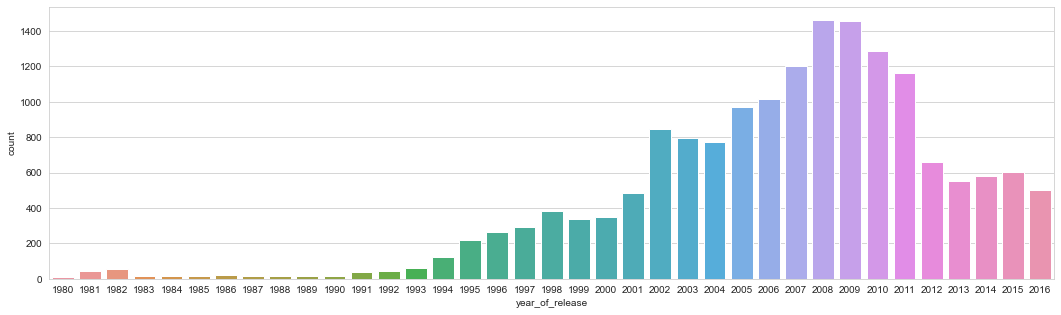

In [35]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = data_games, x='year_of_release');

In [36]:
data_games.pivot_table(index='year_of_release', values='platform', aggfunc='nunique').T

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,1,1,1,2,2,4,2,2,4,3,...,11,9,7,8,9,9,11,10,10,9


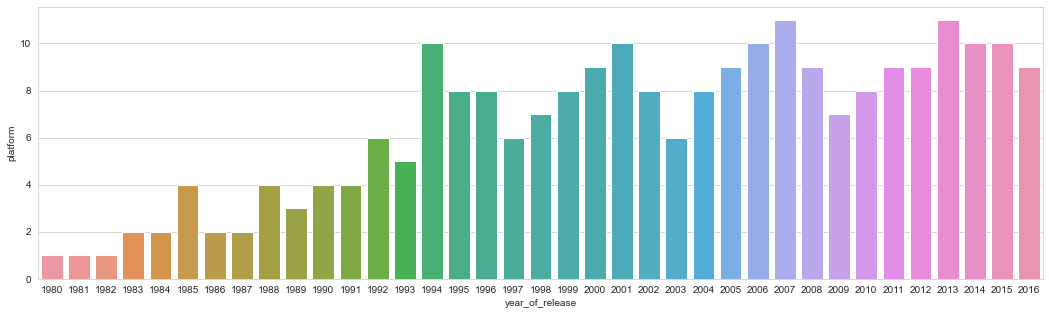

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.barplot(data = data_games.pivot_table(index='year_of_release',\
                                          values='platform', aggfunc='nunique'),\
            x = data_games.pivot_table(index='year_of_release', values='platform', aggfunc='nunique').index,\
            y = 'platform');


In [38]:
for ind in data_games['year_of_release'].sort_values().unique():
    print(ind, data_games[data_games['year_of_release'] == ind]['platform'].value_counts(), sep = '\n')

1980
2600    9
Name: platform, dtype: int64
1981
2600    46
Name: platform, dtype: int64
1982
2600    53
Name: platform, dtype: int64
1983
2600    11
NES      6
Name: platform, dtype: int64
1984
NES     13
2600     1
Name: platform, dtype: int64
1985
NES     11
2600     1
PC       1
DS       1
Name: platform, dtype: int64
1986
NES     19
2600     2
Name: platform, dtype: int64
1987
NES     10
2600     6
Name: platform, dtype: int64
1988
NES     11
2600     2
GB       1
PC       1
Name: platform, dtype: int64
1989
GB      10
NES      5
2600     2
Name: platform, dtype: int64
1990
NES     8
SNES    4
GB      3
GEN     1
Name: platform, dtype: int64
1991
SNES    24
GB       9
NES      7
GEN      1
Name: platform, dtype: int64
1992
SNES    21
GB       7
GEN      6
PC       5
NES      3
GG       1
Name: platform, dtype: int64
1993
SNES    46
GEN      7
NES      4
NG       2
SCD      1
Name: platform, dtype: int64
1994
SNES    53
SAT     19
PS      17
GEN     12
PC       6
SCD      5
NG     

Наибольшее кол-во игр было выпущено в 2008-2009 гг. Заметно снижение объема с начала 2012 года, особое снижение в карманных платформах, возможно связано с развитие игр на телефонах. 
Считаю важными периодами 2014-2016, т.к. в предыдущих годах уже многие платформы ушли в историю. 

### Как менялись продажи по платформам. 

In [39]:
# создадим таблицу продаж платформ по годам
data_year_platform_sales = data_games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
data_year_platform_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,39.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


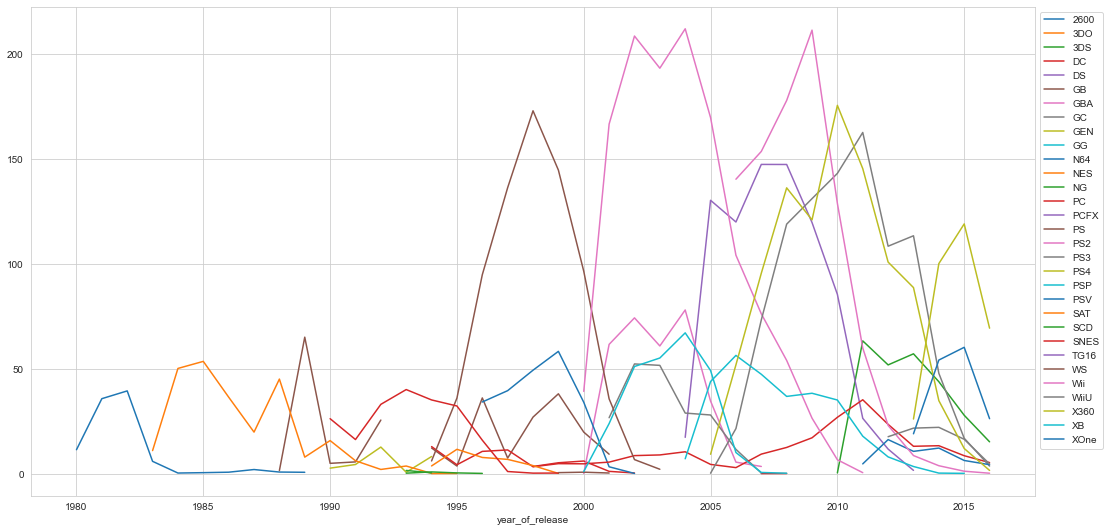

In [40]:
data_year_platform_sales.plot(y=['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV',  'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne'],\
                              use_index=True,figsize=(18, 9));
plt.legend(bbox_to_anchor=(1, 1));

In [41]:
# создадим таблицу по платформе и кол-ву лет 
data_platform_years = data_games.pivot_table(index='platform', values='year_of_release', aggfunc=lambda x:x.max()-x.min()+1)
data_platform_years.median()

year_of_release    8.0
dtype: float64

In [42]:
# посчитаем продажи по платформам
data_platform_total_sales = data_games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
data_platform_total_sales.head(10)


,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


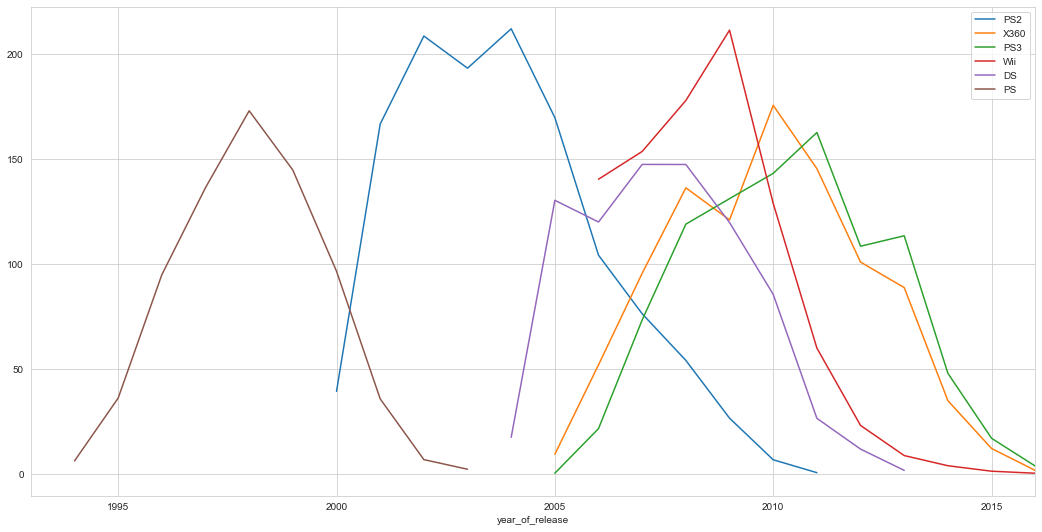

In [43]:
data_year_platform_sales.plot(y=['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], use_index=True, figsize=(18, 9), xlim=(1993,2016));
plt.legend(bbox_to_anchor=(1, 1));

In [44]:
#data_top6 = data_games[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']]
data_year_platform_sales_top6 = data_year_platform_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']].dropna(how='all')
data_year_platform_sales_top6.head()

platform,PS2,X360,PS3,Wii,DS,PS
year_of_release,,,,,,
1985,NaN,NaN,NaN,NaN,0.02,NaN
1994,NaN,NaN,NaN,NaN,NaN,6.03
1995,NaN,NaN,NaN,NaN,NaN,35.96
1996,NaN,NaN,NaN,NaN,NaN,94.70
1997,NaN,NaN,NaN,NaN,NaN,136.17


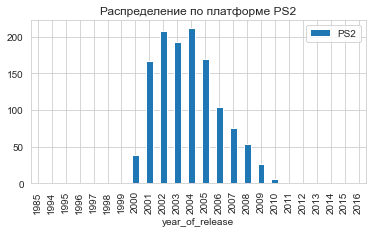

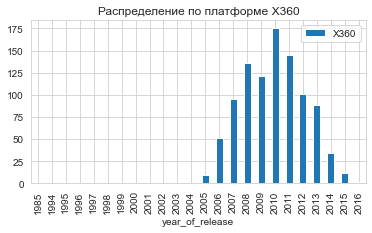

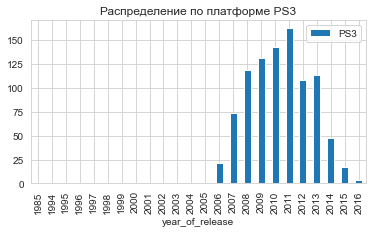

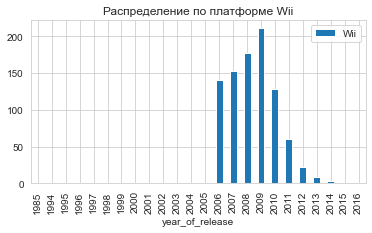

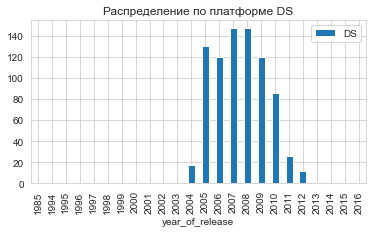

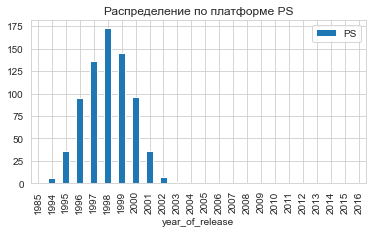

In [45]:
for ind in ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']:
    data_year_platform_sales_top6.plot(kind = 'bar', y=ind, use_index=True, figsize=(6, 3), xlim=(1993,2016));
    plt.legend(bbox_to_anchor=(1, 1));
    plt.title('Распределение по платформе ' + ind)
    plt.show()

Самые популярные платформы по продажам:

	
|platform	| total_sales |
|:----|:---:|
|PS2	|1255.77|
|X360	|971.42|
|PS3	|939.65|
|Wii	|907.51|
|DS	|806.12|
|PS	|730.86|

Самые популярные платформы уже ушли в прошлое. 

Платформы существуют в среднем 8 лет. 

### Выбор актуального периода для анализа:

Учитывая, что время жизни платформы в средне 8 лет и пики продаж приходит в середине жизни платформы, а также что 2016 год не полный, то считаю актуальный период 4 года, т.е. для анализа надо брать с 2012 года по 2015 год. 

In [46]:
data_games_12_15 = data_games[(2012 <= data_games['year_of_release']) & (data_games['year_of_release'] <= 2015)]

### Анализ по актуальному периоду:

In [47]:
# создадим таблицу продаж платформ по годам
data_year_platform_sales_12_15 = data_games_12_15.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
data_year_platform_sales_12_15

year_of_release,2012,2013,2014,2015
platform,,,,
3DS,51.76,57.04,43.76,27.78
DS,11.67,1.54,NaN,NaN
PC,23.45,13.01,13.28,8.52
PS3,108.28,113.25,47.76,16.82
PS4,NaN,25.99,100.00,118.90
PSP,7.95,3.38,0.24,0.12
PSV,16.19,10.59,12.16,6.25
Wii,22.94,8.59,3.75,1.14
WiiU,17.56,21.65,22.03,16.35


In [48]:
data_year_platform_sales_12_15['total_2012_2015'] = data_year_platform_sales_12_15.sum(axis=1)

In [49]:
data_year_platform_sales_12_15.sort_values('total_2012_2015', ascending = False)

year_of_release,2012,2013,2014,2015,total_2012_2015
platform,,,,,
PS3,108.28,113.25,47.76,16.82,286.11
PS4,NaN,25.99,100.00,118.90,244.89
X360,100.72,88.58,34.74,11.96,236.00
3DS,51.76,57.04,43.76,27.78,180.34
XOne,NaN,18.96,54.07,60.14,133.17
WiiU,17.56,21.65,22.03,16.35,77.59
PC,23.45,13.01,13.28,8.52,58.26
PSV,16.19,10.59,12.16,6.25,45.19
Wii,22.94,8.59,3.75,1.14,36.42


In [50]:

# посчитаем продажи по платформам
data_12_15_platform_total_sales = data_games_12_15.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
data_12_15_platform_total_sales.head(10)

,total_sales
platform,
PS3,286.11
PS4,244.89
X360,236.00
3DS,180.34
XOne,133.17
WiiU,77.59
PC,58.26
PSV,45.19
Wii,36.42


In [51]:
data_year_platform_sales_12_15.T.drop(index=['total_2012_2015'])

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.76,11.67,23.45,108.28,NaN,7.95,16.19,22.94,17.56,100.72,NaN
2013,57.04,1.54,13.01,113.25,25.99,3.38,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,12.16,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14


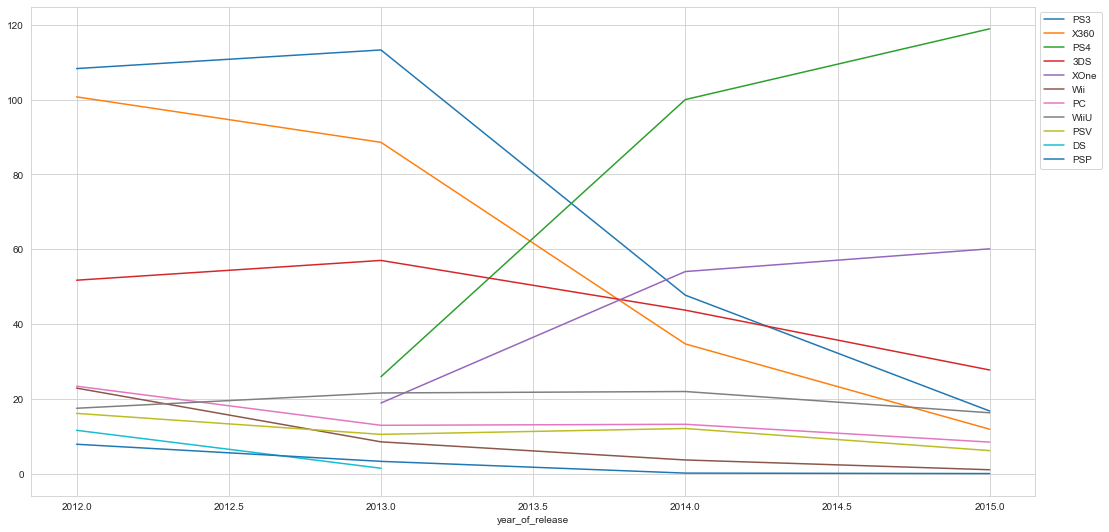

In [52]:
data_year_platform_sales_12_15.T.drop(index=['total_2012_2015']).plot(y=['PS3', 'X360', 'PS4', '3DS', 'XOne', 'Wii', 'PC', 'WiiU', 'PSV', 'DS', 'PSP'], use_index=True, figsize=(18, 9));
plt.legend(bbox_to_anchor=(1, 1));

Лидирующие платформы в актуальном периоде:


|platform |2012|	2013	|2014	|2015	|total_2012_2015	|
|:---|:----:|:----:|:----:|:----:|:----:|
|PS3	|108.28	|113.25	|47.76	|16.82	|286.11|
|PS4	|NaN	|25.99|	100.00|	118.90|	244.89|
|X360	|100.72|	88.58|	34.74	|11.96	|236.00|
|3DS|	51.76	|57.04	|43.76|	27.78|	180.34|
|XOne|	NaN	|18.96|	54.07|	60.14|	133.17|

Три из пяти лидирующих платформ падают. Платформы заканчивают свой жизненый цикл. 

Две (`PS4` и `XOne`) растут, которые только начали свой жизненый путь, которые можно отнести к потенциально прибыльным платформам.



### Построение графика «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [53]:
# создадим таблицу из потенциально прибыльных платформ PS4 и XOne
data_games_top2 = data_games[data_games['platform'].isin(['PS4', 'XOne'])]
data_games_top2.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0_Not,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,5_M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,2_E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0_Not,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,5_M,7.66


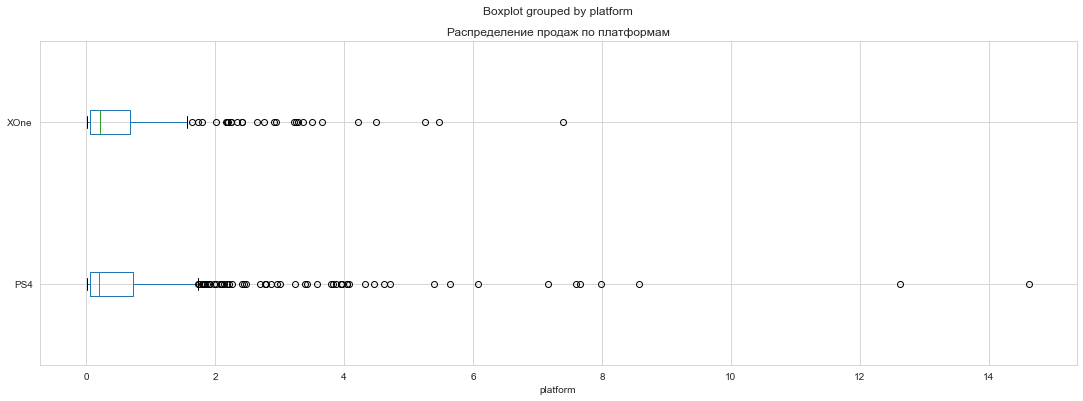

In [54]:
# распределние продаж по платформам
data_games_top2.boxplot(column='total_sales', by='platform', vert=False, figsize=(18, 6));
plt.title('Распределение продаж по платформам');


(0.0, 3.0)

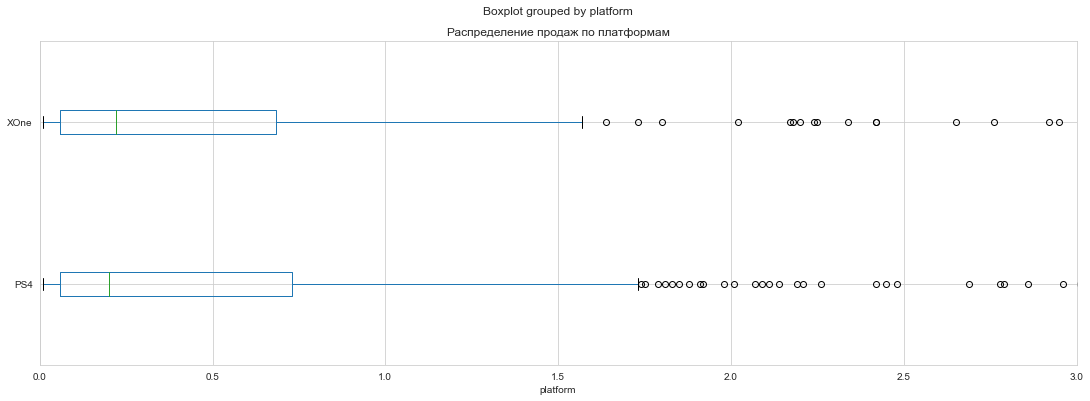

In [55]:
# распределние продаж по платформам
data_games_top2.boxplot(column='total_sales', by='platform', vert=False, figsize=(18, 6));
plt.title('Распределение продаж по платформам');
plt.xlim(0, 3)



In [56]:
data_games_top2.groupby('platform')['total_sales'].median()

platform
PS4     0.20
XOne    0.22
Name: total_sales, dtype: float64

Основные продажи по играм находятся в 0.2 млн копий. 

Выбросы существуют у обоих платформ, т.к. всегда найдется очень популярная игра. 

В PS4 6 игр популярнее самой популярной на XOne. 

### Влияние на продажи внутри платформы PS4 отзывов пользователей и критиков. 

Посмотрим как влияют на продажи внутри платформы `PS4` отзывы пользователей и критиков. 

In [57]:
# оставим в данных только данные с PS4
data_games_PS4 = data_games[data_games['platform'] == 'PS4']
data_games_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0_Not,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,5_M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,2_E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,0_Not,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,5_M,7.66


C:\Users\ig_so\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


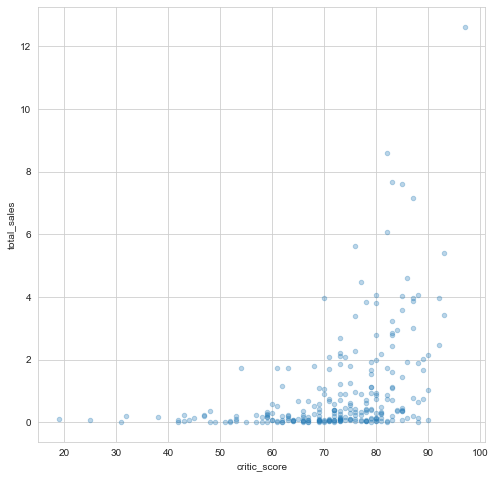

In [58]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы критиков
data_games_PS4.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

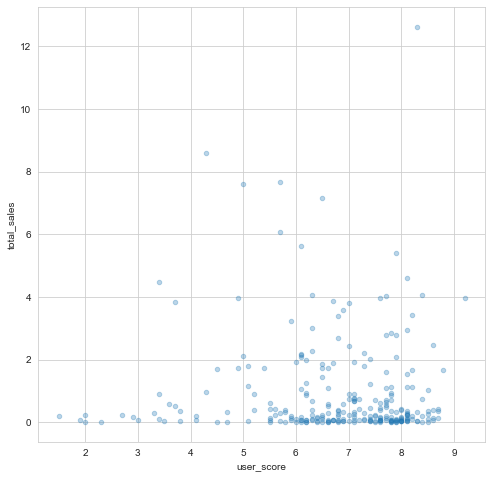

In [59]:
# выведем таблицу рассеивания по платформе PS4, отобразив отзывы пользователей
data_games_PS4.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3, figsize=(8,8), grid=True)
plt.show()

In [60]:
coor_critic_score = data_games_PS4['total_sales'].corr(data_games_PS4['critic_score'])
coor_user_score = data_games_PS4['total_sales'].corr(data_games_PS4['user_score'])
print('Коэффициент корреляции между оценками критиков и продажами =', f'{coor_critic_score:.2%}')
print('Коэффициент корреляции между оценками пользователей и продажами =', f'{coor_user_score:.2%}') 

Коэффициент корреляции между оценками критиков и продажами = 40.66%
Коэффициент корреляции между оценками пользователей и продажами = -3.20%


Между оценкой критиков и продажами есть положительная средняя корреляция 40.66%. 

Между оценкой пользователей праткически нет корреляции -3.20. 

Можно сказать, что оценки критиков более объективны чем пользователей.

### Соотнесем выводы с продажами игр на других платформах.

In [61]:
data_games.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
2600,133.0,0.729173,0.917799,0.07,0.3000,0.460,0.7800,7.81
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,520.0,0.498077,1.430876,0.01,0.0500,0.120,0.3300,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2151.0,0.374765,1.426451,0.01,0.0500,0.110,0.2700,29.80
GB,98.0,2.606735,5.365478,0.06,0.3025,1.165,2.1650,31.38
GBA,822.0,0.386679,0.896897,0.01,0.0525,0.160,0.3900,15.84
GC,556.0,0.357788,0.686346,0.01,0.0600,0.150,0.3525,7.06
GEN,27.0,1.050000,1.490041,0.03,0.0700,0.150,1.7050,6.02


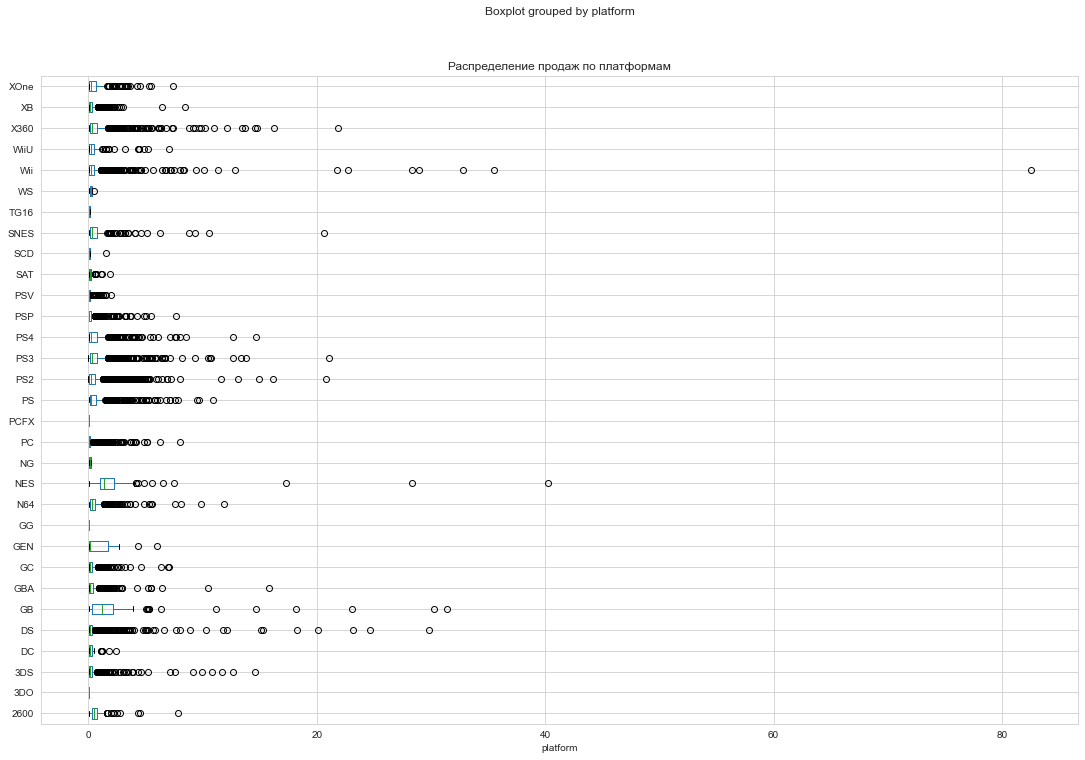

In [62]:
# распределние продаж по платформам
data_games.boxplot(column='total_sales', by='platform', vert=False, figsize=(18, 12));
plt.title('Распределение продаж по платформам');

Практически на каждой платформе существуют своя игра-хит, но основная масса находится в в пределах 0,5 млн копий продаж. 

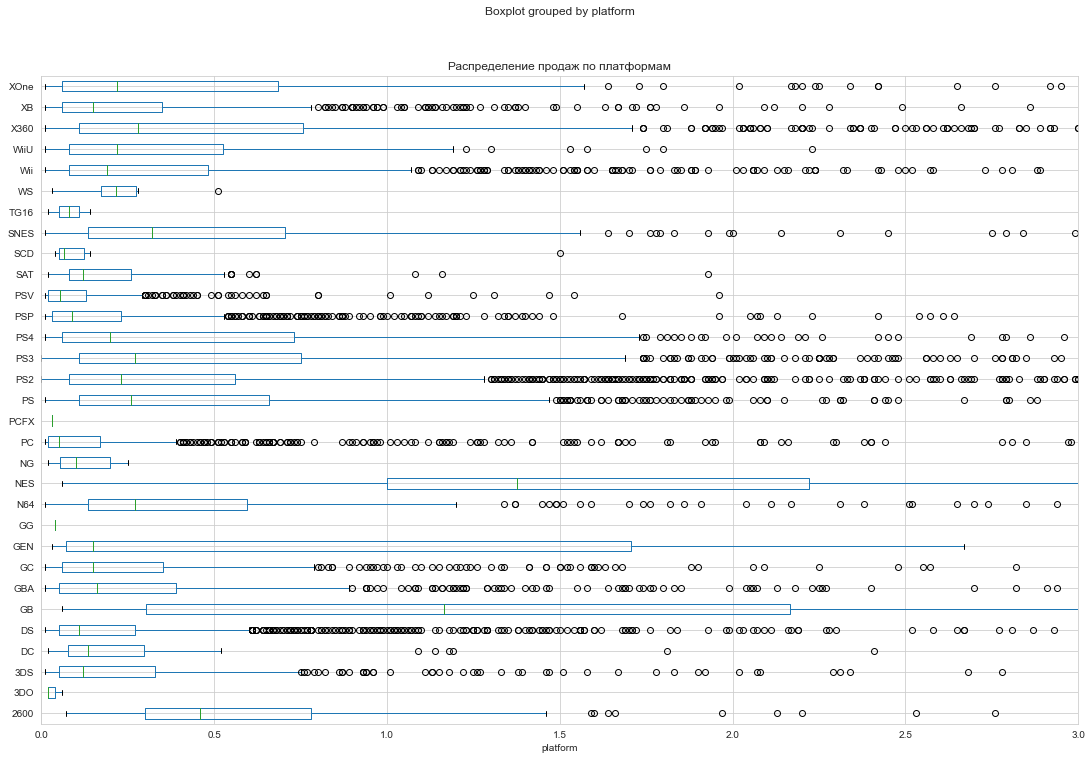

In [63]:
# распределние продаж по платформам до 3 млн. копий
data_games.boxplot(column='total_sales', by='platform', vert=False, figsize=(18, 12));
plt.xlim(0, 3)
plt.title('Распределение продаж по платформам');

Всего две платформы NES и GB имеют медианное значение болеш 1 млн. копий, остальные до 0,5 млн. 

In [64]:
dict_platform_corr = {}
for ind in data_games['platform'].unique():
    dict_platform_corr[ind] = [round(data_games[data_games['platform'] == ind]['total_sales'].\
                               corr(data_games[data_games['platform'] == ind]['critic_score']), 2),\
                             round(data_games[data_games['platform'] == ind]['total_sales'].\
                               corr(data_games[data_games['platform'] == ind]['user_score']), 2)]
dict_platform_corr

{'Wii': [0.18, 0.11],
 'NES': [nan, nan],
 'GB': [nan, nan],
 'DS': [0.24, 0.13],
 'X360': [0.39, 0.11],
 'PS3': [0.43, 0.13],
 'PS2': [0.4, 0.17],
 'SNES': [nan, nan],
 'GBA': [0.24, 0.1],
 'PS4': [0.41, -0.03],
 '3DS': [0.35, 0.22],
 'N64': [nan, nan],
 'PS': [0.45, 0.3],
 'XB': [0.38, 0.18],
 'PC': [0.26, 0.01],
 '2600': [nan, nan],
 'PSP': [0.32, 0.22],
 'XOne': [0.42, -0.07],
 'WiiU': [0.35, 0.4],
 'GC': [0.33, 0.23],
 'GEN': [nan, nan],
 'DC': [0.35, -0.3],
 'PSV': [0.13, 0.01],
 'SAT': [nan, nan],
 'SCD': [nan, nan],
 'WS': [nan, nan],
 'NG': [nan, nan],
 'TG16': [nan, nan],
 '3DO': [nan, nan],
 'GG': [nan, nan],
 'PCFX': [nan, nan]}

In [65]:
data_platform_corr = pd.DataFrame.from_dict(dict_platform_corr)
data_platform_corr.index = ['corr_critic_score', 'corr_user_score'] 
data_platform_corr.dropna(how='all', axis=1, inplace=True)
data_platform_corr

,Wii,DS,X360,PS3,PS2,GBA,PS4,3DS,PS,XB,PC,PSP,XOne,WiiU,GC,DC,PSV
corr_critic_score,0.18,0.24,0.39,0.43,0.40,0.24,0.41,0.35,0.45,0.38,0.26,0.32,0.42,0.35,0.33,0.35,0.13
corr_user_score,0.11,0.13,0.11,0.13,0.17,0.10,-0.03,0.22,0.30,0.18,0.01,0.22,-0.07,0.40,0.23,-0.30,0.01


Основные выводы:
- Не все платформы имеют оценки, что вызвано тем, что раньше оценки играм не давали и не все платформы оценивали игры. 

- Среднюю кореляцию по оценкам критиков имеют большинство платформ. 

- Малую коррелицию имеют так же большинство платформ.

- Можно сделать вывод, что лучше смотреть оценку критиков, чем пользователей для роста продаж. 

Если сравнивать с PS4, то большинство платформы ведут себя одинаково:
- есть игра ХИТ;
- имеют среднюю корреляцию с оценкой критиков;

Но есть различия с оценкой пользователей:
- Корреляцию от средней отрицательной до средней положительности, что говорить о необъективности оценок пользователей или накруткой оценок.


### Посмотрим на общее распределение игр по жанрам.

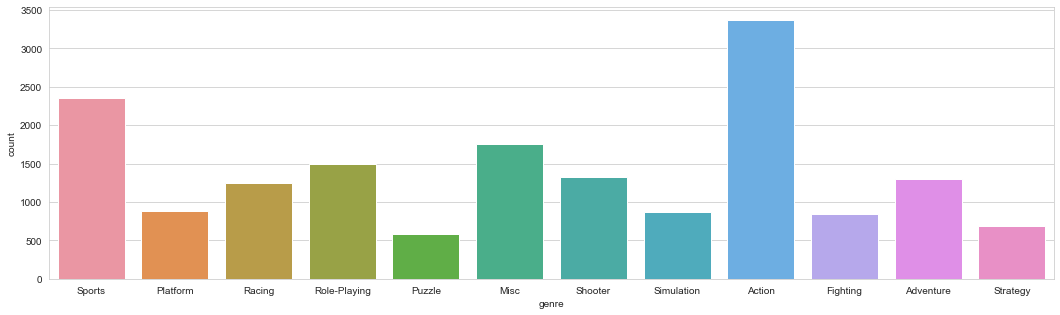

In [66]:
# посмотрим на распределенние по кол-ву игр
sns.set_style('whitegrid')
plt.figure(figsize=(18, 5))
sns.countplot(data = data_games, x='genre');

In [67]:
# посчитаем кол-во игр по жанрам
data_games.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending = False)

,name
genre,
Action,3369
Sports,2348
Misc,1750
Role-Playing,1498
Shooter,1323
Adventure,1303
Racing,1249
Platform,888
Simulation,873


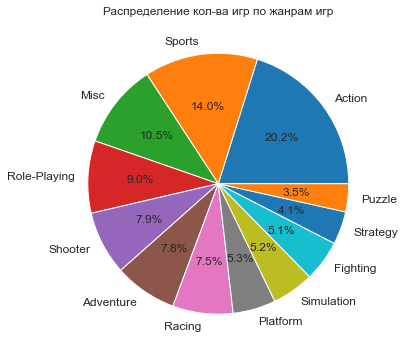

In [68]:
# визуализируем кол-во игр по жанрам
data_games.pivot_table(index='genre', values='name', aggfunc='count').sort_values('name', ascending = False)['name'].plot(kind = 'pie', 
                             title = 'Распределение кол-ва игр по жанрам игр', autopct='%1.1f%%', fontsize=12, 
                             figsize = (6, 6), legend=False);
plt.axis('off');

Самые полулярные жанры по кол-ву игр:

|    Жанр| Кол-во игор| Доля |
|:----|:----:|:----:|
|Action|3369|20.2%|
|Sports|2348|14.0%|
|Misc|1750|10.5%|

In [69]:
# посчитаем мудианное значение игр по жанрам
data_games.pivot_table(index='genre', values='total_sales', aggfunc='median').sort_values('total_sales', ascending = False)

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


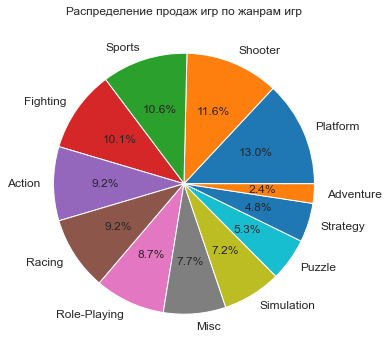

In [70]:
# визуализируем суммы продаж по жанрам
data_games.pivot_table(index='genre', values='total_sales', aggfunc='median').\
sort_values('total_sales', ascending = False)['total_sales'].plot(kind = 'pie', 
                             title = 'Распределение продаж игр по жанрам игр', autopct='%1.1f%%', fontsize=12, 
                             figsize = (6, 6), legend=False);
plt.axis('off');

Самые популярные жанры по медианной прибыльности игр:

|    Жанр| Медианное проданное кол-во(млн.)| Доля |
|:----|:----:|:----:|
|Platform	|0.27|13.0%|
|Shooter	|0.24|11.6%|
|Sports|	0.22|10.6%|

Первые два места как в кол-ве игр, так и в популярности лидируют  *Action* и *Sports*

Непопулярные жанры:

|    Жанр| Медианное проданное кол-во(млн.)| Доля |
|:----|:----:|:----:|
|Puzzle	|0.11|5.3%|
|Strategy	|0.10|4.8%|
|Adventure|	0.05|2.4%|

## Портрет пользователя по регионам (NA, EU, JP):

### Самые популярные платформы (топ-5)

In [71]:
# посмотрим ТОП5 платформ по регионам и объеденим их в одну
data_platform_top_5_regions = pd.DataFrame()
region = ['na_sales', 'eu_sales', 'jp_sales']
for ind in region:
    display(data_games.pivot_table(index='platform', values=ind, aggfunc='sum').sort_values(ind, ascending = False)[:5])
    data_platform_top_5_regions = pd.concat([data_platform_top_5_regions, data_games.pivot_table(index='platform', values=ind, aggfunc='sum').sort_values(ind, ascending = False)[:5]], axis=1)
display(data_platform_top_5_regions)
    
    

,na_sales
platform,
X360,602.47
PS2,583.84
Wii,496.90
PS3,393.49
DS,382.40


,eu_sales
platform,
PS2,339.29
PS3,330.29
X360,270.76
Wii,262.21
PS,213.61


,jp_sales
platform,
DS,175.57
PS,139.82
PS2,139.20
SNES,116.55
3DS,100.67


,na_sales,eu_sales,jp_sales
platform,,,
X360,602.47,270.76,NaN
PS2,583.84,339.29,139.20
Wii,496.90,262.21,NaN
PS3,393.49,330.29,NaN
DS,382.40,NaN,175.57
PS,NaN,213.61,139.82
SNES,NaN,NaN,116.55
3DS,NaN,NaN,100.67


Популярные платформы:

| platform	| na	| platform	| eu	| platform	| jp|
|:--:|:--:|:--:|:--:|:--:|:--:|
| X360	| 602.47	| PS2	| 339.29	| DS	| 175.57|
| PS2	| 583.84	| PS3	| 330.29	| PS	| 139.82|
| Wii	| 496.90	| X360	| 270.76	| PS2	| 139.20|
| PS3	| 393.49	| Wii	| 262.21	| SNES	| 116.55|
| DS	| 382.40	| PS	| 213.61	| 3DS	| 100.67|



Различия в ТОП5 по регионам связан с распространением игр, запуском и циклом платформ, а также японская требовательность. 

Изучая материала в сети интернета, могу предположить, что отсутствие трех лидера из ТОП5 в na и eu в ТОП5 в jp связаны с их техническими проблемами, что не устраивало японских требовательных пользователей:
- X360 часто вис;
- Wii грелся;
- PS3 некоректно работал с играми PS и PS2. 

Лидеры продаж в Японии, остутствующие в Европе и Северной Америке можно объяснить ранними платформами, которые стартовали в Японии и быстрее захватили её. 

Единственная платформа PS2 существует в ТОП5 каждого региона. Платформа имеет один из длинных жизненных циклов. Успела занять свою нишу на всех континентах.  


### Самые популярные жанры (топ-5). 

In [72]:
# посмотрим ТОП5 платформ по регионам и объеденим их в одну
data_genre_top_5_regions = pd.DataFrame()
region = ['na_sales', 'eu_sales', 'jp_sales']
for ind in region:
    display(data_games.pivot_table(index='genre', values=ind, aggfunc='sum').sort_values(ind, ascending = False)[:6])
    data_genre_top_5_regions = pd.concat([data_genre_top_5_regions, data_games.pivot_table(index='genre', values=ind, aggfunc='sum').sort_values(ind, ascending = False)[:5]], axis=1)
display(data_genre_top_5_regions)
    
    

,na_sales
genre,
Action,879.01
Sports,684.43
Shooter,592.24
Platform,445.50
Misc,407.27
Racing,359.35


,eu_sales
genre,
Action,519.13
Sports,376.79
Shooter,317.34
Racing,236.51
Misc,212.74
Platform,200.35


,jp_sales
genre,
Role-Playing,355.41
Action,161.43
Sports,135.54
Platform,130.83
Misc,108.11
Fighting,87.48


,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Sports,684.43,376.79,135.54
Shooter,592.24,317.34,NaN
Platform,445.50,NaN,130.83
Misc,407.27,212.74,108.11
Racing,NaN,236.51,NaN
Role-Playing,NaN,NaN,355.41


ТОП5 по жанрам по регионам:

|genre|	na	|genre	|eu	|genre|	jp|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Action	|879.01	|Action	|519.13|	Role-Playing|	355.41|
|Sports	|684.43	|Sports	|376.79|	Action	|161.43|
|Shooter|	592.24	|Shooter	|317.34	|Sports|	135.54|
|Platform	|445.50|	Racing|	236.51	|Platform	|130.83|
|Misc	|407.27|	Misc	|212.74	|Misc|	108.11|


По ТОП 5 по жанрам по регионам, можно сказать что лидеры одинаковы для регионов за некоторым исключением:
    
- В Японии нет среди лидеров *Shooter*, то связано с доброжелательностью японцев.
- *Racing* нет в Америке и Японии, скорее всего вызван не популярность самого вида спорта в этих регионах. 
- *Platform* нет в ТОП5 в Европе, просто немного не хватило до ТОП5, около 6%. Вытеснил *Racing*
- То что лидер в ТОП5 Японии *Role-Playing*, скорее всего связан с культурой Японией, несмотря ни на что они остаються детьми и продолжают играть в куклы. хотя куклы уже виртуальные.

### Влияние рейтинга ESRB на продажи

In [73]:
# создадим таблицу по рейтингам и регионам по продажам
data_games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],  aggfunc='sum').sort_index()

,eu_sales,jp_sales,na_sales
rating,,,
0_Not,613.30,841.93,1240.68
1_EC,0.11,0.00,1.53
2_E,710.52,199.57,1295.55
3_E10+,188.52,40.20,353.32
4_T,427.03,151.40,759.75
5_M,483.97,64.24,748.48
6_AO,0.61,0.00,1.26
7_RP,0.08,0.00,0.00


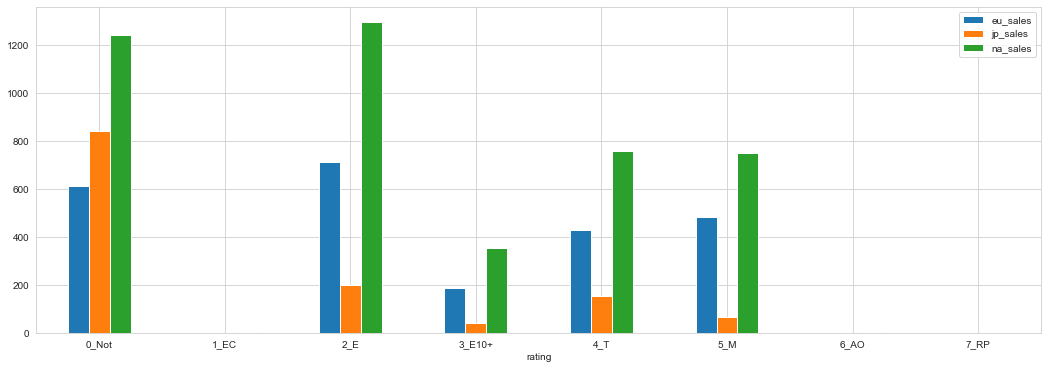

In [74]:
# посмотрим визуально на таблицу
data_games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'],  aggfunc='sum').\
plot(kind = 'bar', figsize=(18,6), rot=0);

Лидеры по продажам игры без рейтинга и с рейтингом Е.

В Европе, с ростом ограничений с E10+(от 10 лет) до М (для взрослых) заметен рост продаж игр. В остальных регионах такой закономерности не наблюдается.

## Проверка гипотез:

### Проверим гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
```
H_0: Средний пользовательский рейтинг (user_score)  платформs Xbox One ('platform' =='XOne') = 
                        Средний пользовательский рейтинг (user_score)  платформs PC ('platform' =='PC')

H_1: Средний пользовательский рейтинг (user_score)  платформs Xbox One ('platform' =='XOne') ≠ 
                        Средний пользовательский рейтинг (user_score)  платформs PC ('platform' =='PC')
```
alpha = 0.05

Использовать буду T-критерий, т.к. он предназначен для средних значений двух независимых выборок.

In [75]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_games[(data_games['platform'] =='XOne') & (~data_games['user_score'].isna())]['user_score'],
    data_games[(data_games['platform'] =='PC') & (~data_games['user_score'].isna())]['user_score'],
    equal_var = False)
# alpha = задаю значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', f'{results.pvalue:.5%}')

# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00049%
Отвергаем нулевую гипотезу


### Проверим гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
H_0: Средний пользовательский рейтинг (user_score)  жанра Action ('genre' == 'Action') = 
                Средний пользовательский рейтинг (user_score)  жанра Sports ('genre' == 'Sports')

H_1: Средний пользовательский рейтинг (user_score)  жанра Action ('genre' == 'Action') ≠ 
                Средний пользовательский рейтинг (user_score)  жанра Sports ('genre' == 'Sports')
```
alpha = 0.05

Использовать буду T-критерий, т.к. он предназначен для средних значений двух независимых выборок.


In [76]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data_games[(data_games['genre'] =='Action') & (~data_games['user_score'].isna())]['user_score'],
    data_games[(data_games['genre'] =='Sports') & (~data_games['user_score'].isna())]['user_score'],
    equal_var = False)
# alpha = задаю значение уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение:', f'{results.pvalue:.5%}')
# условный оператор с выводом строки с ответом
if results.pvalue < alpha: 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 11.48386%
Не получилось отвергнуть нулевую гипотезу


## Общий вывод

### Выводы по просмотру данных и общей информации:
1. Представлены данные состоят из 11 столбцов и 16715 строк.
2. Часть столбцов имеют пропуски:
    - Name
    - Year_of_Release
    - Critic_Score
    - User_Score
    - Rating
3. Столбец Year_of_Release имеет тип float64, а должен int. 
4. Столбец User_Score имеет тип object, а должен float или int. 
5. Дублирующих данных нет

### Вывод по подготовке данных

1. Привел названия столбцов к нижнему регистру

2. `name`:
    - Отсутствуют два значения. Данные удалены. Ошибка или не было данных. 
    
3. `platform`:
    - Пустых значений нет;
    - столбец без изменений.
    
4. `year_of_release`:
    - Пустых значений 269. Возможно, ошибка ввода или отстутствие точного года релиза игры. Заменил согласно кол-ву уникальных значений по `name` на других `platform`:
        - Где получим 1 уникальное значение, там установим медианное значение по `platform`
        - Где 2, там пустые ячейки заменим на цифровое значения, т.к. чаще всего игра с одинаковым названием выходила в один год на всех платформам.
        - Где 3 и 4 выбрал `year_of_release` в рамках работы `platform` и по нему установим медианное значение, если не будет таких данных, то установим медианное значение по `platform`.
    - Преобразовал тип данных в int, так как год не может быть дробным.
    
5. `genre`:
    - Отсутствуют два значения. Данные удалены по столбцу name. Ошибка или не было данных. 
    
6. `na_sales`, `eu_sales`, `jp_sales` и	`other_sales`:
    - пустых значений нет;
    - столбцы без изменений;
    
7. `critic_score`:
    - 8578 пустых значений. Пустые не удалил, т.к. вполне игры могут быть без оценок критиков. Игра не заслуживает внимание критиков. 
    - Тип данных float не поменял на int, хотя все значения целочисленные, т.к. NaN не дает сделать замену. 
    
8. `user_score`:
    - 6701 пустых значений;
    - 2424 значений с 'tbd'. Решил, что это аббревиатура To Be Determined (будет определено), т.е. либо мало оценок, либо не внесли в данные. Заменил на пустые ячейки. 
    - Пустые не удаляю, т.к. вполне может быть игра без оценки, учитывая, что большинство в портативных версиях. 
    - Заменил тип данных на float
    
9. `rating`:
    - 6766 пустых значения. Заменил на 'Not'. 
    - Т.к. K-A был заменен на E в конце 90-х, то и я сделал замену `K-A` на `E`. 
    
10. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

### Выводы по исследовательскому анализу данных:
Наибольшее кол-во игр было выпущено в 2008-2009 гг. Заметно снижение объема с начала 2012 года, особое снижение в карманных платформах, возможно связано с развитие игр на телефонах. 
Считаю важными периодами 2014-2016, т.к. в предыдущих годах уже многие платформы ушли в историю. 
Самые популярные платформы по продажам:

Самые популярные платформы по продажам:

	
|platform	| total_sales |
|:----|:---:|
|PS2	|1255.77|
|X360	|971.42|
|PS3	|939.65|
|Wii	|907.51|
|DS	|806.12|
|PS	|730.86|

Самые популярные платформы уже ушли в прошлое. 

Платформы существуют в среднем 8 лет. 

Учитывая, что время жизни платформы в среднем 8 лет и пики продаж приходит в середине жизни платформы, а также что 2016 год не полный, то считаю актуальный период 4 года, т.е. для анализа надо брать с 2012 года по 2015 год.

Лидирующие платформы в актуальном периоде:


|platform |2012|	2013	|2014	|2015	|total_2012_2015	|
|:---|:----:|:----:|:----:|:----:|:----:|
|PS3	|108.28	|113.25	|47.76	|16.82	|286.11|
|PS4	|NaN	|25.99|	100.00|	118.90|	244.89|
|X360	|100.72|	88.58|	34.74	|11.96	|236.00|
|3DS|	51.76	|57.04	|43.76|	27.78|	180.34|
|XOne|	NaN	|18.96|	54.07|	60.14|	133.17|

Три из пяти лидирующих платформ падают. Платформы заканчивают свой жизненый цикл. 

Две (`PS4` и `XOne`) растут, которые только начали свой жизненый путь, которые можно отнести к потенциально прибыльным платформам.

Анализ потенциально прибыльных платформ PS4 и XOne показал: 
- Основные продажи по играм находятся в 0.2 млн копий. 
- Выбросы существуют у обоих платформ, т.к. всегда найдется очень популярная игра. 
- В PS4 6 игр популярнее самой популярной на XOne. 

Влияние на продажи внутри платформы PS4 отзывов пользователей и критиков:
- Между оценкой критиков и продажами есть положительная средняя корреляция 40.66%. 
- Между оценкой пользователей праткически нет корреляции -3.20. 
- Можно сказать, что оценки критиков более объективны чем пользователей.


Основные выводы по платформам:
- Не все платформы имеют оценки, что вызвано тем, что раньше оценки играм не давали и не все платформы оценивали игры. 
- Среднюю кореляцию по оценкам критиков имеют большинство платформ. 
- Малую коррелицию имеют так же большинство платформ.
- Можно сделать вывод, что лучше смотреть оценку критиков, чем пользователей для роста продаж. 

Если сравнивать с PS4, то большинство платформы ведут себя одинаково:
- есть игра ХИТ;
- имеют среднюю корреляцию с оценкой критиков;

Но есть различия с оценкой пользователей:
- Корреляцию от средней отрицательной до средней положительности, что говорить о необъективности оценок пользователей или накруткой оценок.

Самые полулярные жанры по кол-ву игр:

|    Жанр| Кол-во игор| Доля |
|:----|:----:|:----:|
|Action|3369|20.2%|
|Sports|2348|14.0%|
|Misc|1750|10.5%|

Самые популярные жанры по медианной прибыльности игр:

|    Жанр| Медианное проданное кол-во(млн.)| Доля |
|:----|:----:|:----:|
|Platform	|0.27|13.0%|
|Shooter	|0.24|11.6%|
|Sports|	0.22|10.6%|

Первые два места как в кол-ве игр, так и в популярности лидируют  *Action* и *Sports*

Непопулярные жанры:

|    Жанр| Медианное проданное кол-во(млн.)| Доля |
|:----|:----:|:----:|
|Puzzle	|0.11|5.3%|
|Strategy	|0.10|4.8%|
|Adventure|	0.05|2.4%|




### Выводы по портрету пользователей:
Популярные платформы:

| platform	| na	| platform	| eu	| platform	| jp|
|:--:|:--:|:--:|:--:|:--:|:--:|
| X360	| 602.47	| PS2	| 339.29	| DS	| 175.57|
| PS2	| 583.84	| PS3	| 330.29	| PS	| 139.82|
| Wii	| 496.90	| X360	| 270.76	| PS2	| 139.20|
| PS3	| 393.49	| Wii	| 262.21	| SNES	| 116.55|
| DS	| 382.40	| PS	| 213.61	| 3DS	| 100.67|



Различия в ТОП5 по регионам связан с распространением игр, запуском и циклом платформ, а также японская требовательность. 

Изучая материала в сети интернета, могу предположить, что отсутствие трех лидера из ТОП5 в na и eu в ТОП5 в jp связаны с их техническими проблемами, что не устраивало японских требовательных пользователей:
- X360 часто вис;
- Wii грелся;
- PS3 некоректно работал с играми PS и PS2. 

Лидеры продаж в Японии, остутствующие в Европе и Северной Америке можно объяснить ранними платформами, которые стартовали в Японии и быстрее захватили её. 

Единственная платформа PS2 существует в ТОП5 каждого региона. Платформа имеет один из длинных жизненных циклов. Успела занять свою нишу на всех континентах. 

ТОП5 по жанрам по регионам:

|genre|	na	|genre	|eu	|genre|	jp|
|:--:|:--:|:--:|:--:|:--:|:--:|
|Action	|879.01	|Action	|519.13|	Role-Playing|	355.41|
|Sports	|684.43	|Sports	|376.79|	Action	|161.43|
|Shooter|	592.24	|Shooter	|317.34	|Sports|	135.54|
|Platform	|445.50|	Racing|	236.51	|Platform	|130.83|
|Misc	|407.27|	Misc	|212.74	|Misc|	108.11|


По ТОП 5 по жанрам по регионам, можно сказать что лидеры одинаковы для регионов за некоторым исключением:
    
- В Японии нет среди лидеров *Shooter*, то связано с доброжелательностью японцев.
- *Racing* нет в Америке и Японии, скорее всего вызван не популярность самого вида спорта в этих регионах. 
- *Platform* нет в ТОП5 в Европе, просто немного не хватило до ТОП5, около 6%. Вытеснил *Racing*
- То что лидер в ТОП5 Японии *Role-Playing*, скорее всего связан с культурой Японией, несмотря ни на что они остаються детьми и продолжают играть в куклы. хотя куклы уже виртуальные.

Влияние рейтинга ESRB на продажи:
- Лидеры по продажам игры без рейтинга и с рейтингом Е.

- В Европе, с ростом ограничений с E10+(от 10 лет) до М (для взрослых) заметен рост продаж игр. В остальных регионах такой закономерности не наблюдается.




### Выводы по проверке гипотез:
#### Проверили гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
```
H_0: Средний пользовательский рейтинг (user_score)  платформs Xbox One ('platform' =='XOne') = 
                        Средний пользовательский рейтинг (user_score)  платформs PC ('platform' =='PC')

H_1: Средний пользовательский рейтинг (user_score)  платформs Xbox One ('platform' =='XOne') ≠ 
                        Средний пользовательский рейтинг (user_score)  платформs PC ('platform' =='PC')
```
alpha = 0.05

Использовал T-критерий, т.к. он предназначен для средних значений двух независимых выборок.

p-значение: 0.00049%

Отвергаем нулевую гипотезу
#### Проверили гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
```
H_0: Средний пользовательский рейтинг (user_score)  жанра Action ('genre' == 'Action') = 
                Средний пользовательский рейтинг (user_score)  жанра Sports ('genre' == 'Sports')

H_1: Средний пользовательский рейтинг (user_score)  жанра Action ('genre' == 'Action') ≠ 
                Средний пользовательский рейтинг (user_score)  жанра Sports ('genre' == 'Sports')
```
alpha = 0.05

Использовал T-критерий, т.к. он предназначен для средних значений двух независимых выборок.

p-значение: 11.48382%

Не получилось отвергнуть нулевую гипотезу

